# Final Project Machine Learning Course

> Spotify dataset classification

<img alt="spotify-logo" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Spotify_logo_without_text.svg/2048px-Spotify_logo_without_text.svg.png" width="30" height="30">

### <i>Dataset <a href="https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?select=tracks.csv">link</a></i>


# Goal
The goal of this project is to train machine learning models (supervised) that will classified the popularity of a spotify song to three classes:
1. high popular
2. medium popular
3. non popular

In [1]:
# imports
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from utils import get_date_times, apply_popularity

In [2]:
# read data
tracks = pd.read_csv("data/tracks.csv")

## Plot functions

In [3]:
def print_pie(values, lables):
    """
    Function that get values and labels and ploting a pie
    """
    values = list(values)
    fig, ax = plt.subplots()
    fig.set_figheight(7)
    fig.set_figwidth(7)
    ax.pie(values, labels=lables, autopct='%1.1f%%', shadow=True, startangle=90)
    ax.axis('equal')
    plt.show()

# Understanding the data:

### Data features:

1. acousticness (Ranges from 0 to 1)
2. artists (List of artists mentioned)
3. danceability (Ranges from 0 to 1)
4. duration_ms (Integer typically ranging from 200k to 300k)
5. energy (Ranges from 0 to 1)
6. explicit (0 = No explicit content, 1 = Explicit content) ## Categorical:
7. id (Id of track generated by Spotify) ## Numerical:
8. id_artists
9. instrumentalness (Ranges from 0 to 1)
10. key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
11. liveness (Ranges from 0 to 1)
12. loudness (Float typically ranging from -60 to 0)
13. mode (0 = Minor, 1 = Major)
14. name (Name of the song)
15. popularity (Ranges from 0 to 100)
16. release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
17. speechiness (Ranges from 0 to 1)
18. tempo (Float typically ranging from 50 to 150)
19. time_signature
20. valence (Ranges from 0 to 1)

In [4]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [5]:
tracks.tail()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,214360,0,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015-07-01,0.686,0.723,6,-7.067,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204,4


In [6]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [7]:
# another check for finding null objects
tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [8]:
date_times = get_date_times(tracks['release_date'])

In [9]:
print(f"Minimum release date is: {min(date_times).strftime('%Y-%m-%d')}")
print(f"Maximum release date is: {max(date_times).strftime('%Y-%m-%d')}")

Minimum release date is: 1900-01-01
Maximum release date is: 2021-04-16


In [10]:
tracks['popularity'].describe()

count    586672.000000
mean         27.570053
std          18.370642
min           0.000000
25%          13.000000
50%          27.000000
75%          41.000000
max         100.000000
Name: popularity, dtype: float64

In [11]:
print(f"Five most popular songs:\n{tracks.nlargest(5, 'popularity')['name']}")

Five most popular songs:
93802    Peaches (feat. Daniel Caesar & Giveon)
93803                           drivers license
93804                    Astronaut In The Ocean
92810                           Save Your Tears
92811                                 telepatía
Name: name, dtype: object


## Clearing the data

In [12]:
# apply popularity for classification in the following format:
# 
# if <= 70 popularity             - high popular      value: 2
# else if 40 <= popularity < 70   - medium popular    value: 1
# else, popularity < 40           - non popular       value: 0

tracks['popularity'] = tracks['popularity'].apply(lambda x: apply_popularity(x))

# drop id & name of the song
tracks.drop('id', inplace=True, axis=1)
tracks.drop('name', inplace=True, axis=1)

In [13]:
tracks.tail()

,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586667,1,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,2,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,2,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,1,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4
586671,0,214360,0,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015-07-01,0.686,0.723,6,-7.067,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204,4


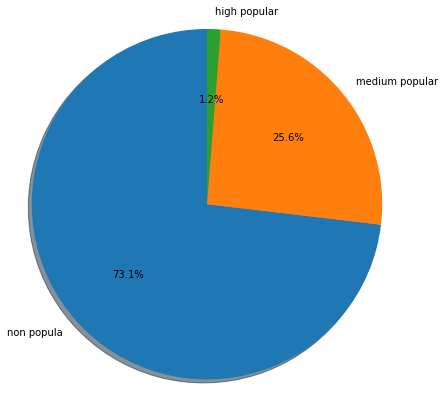

In [14]:
# plot the relative between popularities
values = tracks['popularity'].value_counts()
labels = ['non popula', 'medium popular', 'high popular']
print_pie(values, labels)